In [5]:
from data import Data
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [6]:
class GRU_model(nn.Module):
    def __init__(self, num_inputs, num_hiddens,num_out=1):
        super().__init__()
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
        self.gru = nn.GRU(num_inputs, num_hiddens, bias=False)
        self.linear = nn.Linear(num_hiddens, num_out, bias=False)
    def forward(self, X, H):
        X_0 = torch.zeros(len(X),1)
        X_0[0] = 1.
        out, H = self.gru(X_0,H)
        pred = self.linear(out)
        return pred, H

In [7]:
def train(model, X, optimizer, criterion, H, epoch):
    model.train()
    optimizer.zero_grad()
    y_hat, H = model(X, H)
    loss = criterion(X,y_hat)
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print(torch.sqrt(loss.detach()))

In [8]:
data = Data(0.1,100,0.)
X = data.x.reshape(100,1)
mse_loss = nn.MSELoss()
gru_model = GRU_model(1,2) #hidden state of size 2 is enough for sin
optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.01)
for epoch in range(5000):
    H = torch.zeros(1,2)
    train(gru_model, X, optimizer, mse_loss, H,epoch)

tensor(0.6895)
tensor(0.0668)
tensor(0.0111)
tensor(0.0081)
tensor(0.0061)


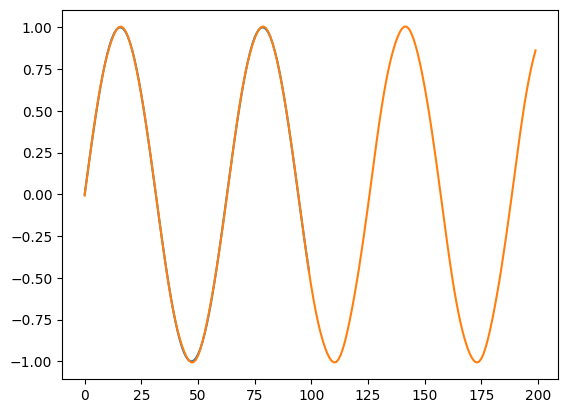

In [9]:
X_pred = torch.zeros(200,1)
a,b = gru_model(X_pred,H)
plt.plot(X)
plt.plot(a.detach())